## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Calculating Reservoir Permeability Using Data: Well Test Analysis

Numpy|Plotting|Domain Concept|Reservoir Engineering

Pwr = Pi-m[log(t) + C]

In [3]:
df = pd.read_csv('Pt.csv')
df.head()

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83


### A Cartesian Analysis: Tell us what kind of test is it

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

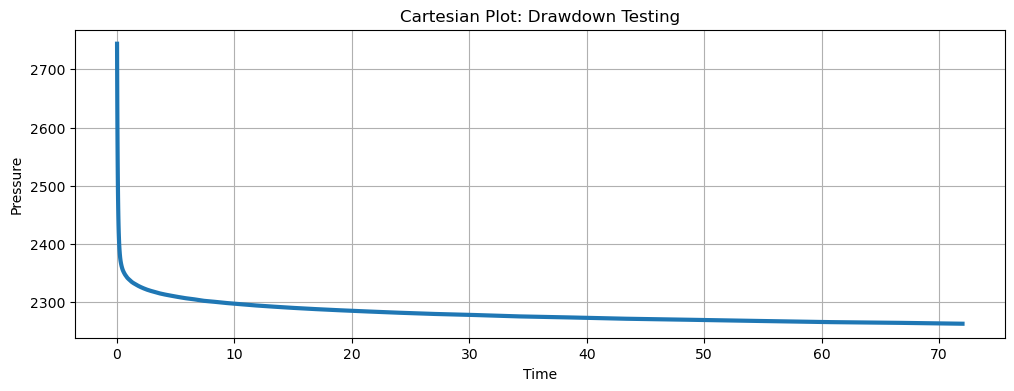

In [47]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(df['time'], df['pressure'],lw=3)

plt.xlabel('Time')
plt.ylabel('Pressure')

plt.title('Cartesian Plot: Drawdown Testing')

plt.grid()
plt.show()

### Semilog Analysis: High level searching for MTR

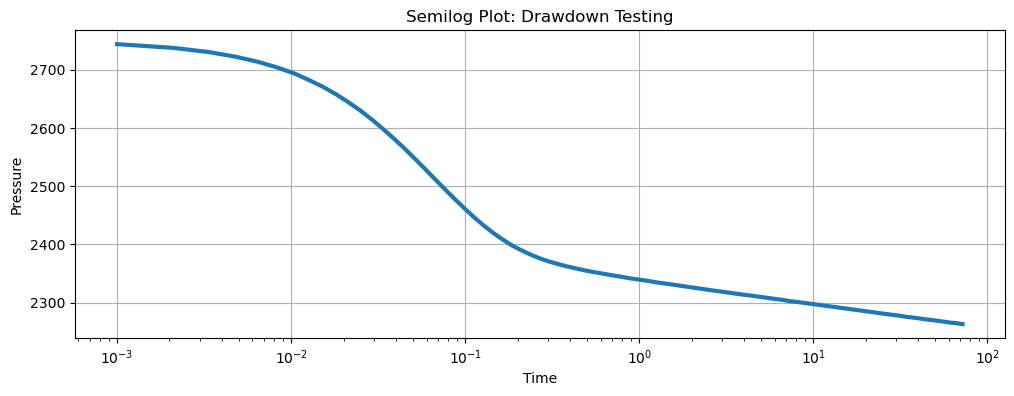

In [48]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'],df['pressure'], lw=3)
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Semilog Plot: Drawdown Testing')
plt.grid()

plt.show()

### Log-Log plot: Computations

In [18]:
Pi = 2760 #psi

df['delP'] = np.abs(Pi - df['pressure'])

df['d(delP)'] = np.zeros(len(df))
df['d(delP)'].iloc[1:] = np.abs(np.diff(df['delP']))

df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['time'])

# Pdash = t * dP/dt

df['Pdash'] = np.zeros(len(df))
df['Pdash'].iloc[0:] = df['time']*df['d(delP)']/df['dt']



In [20]:
df['Pdash'] = df['Pdash'].fillna(0)
df.head()

,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


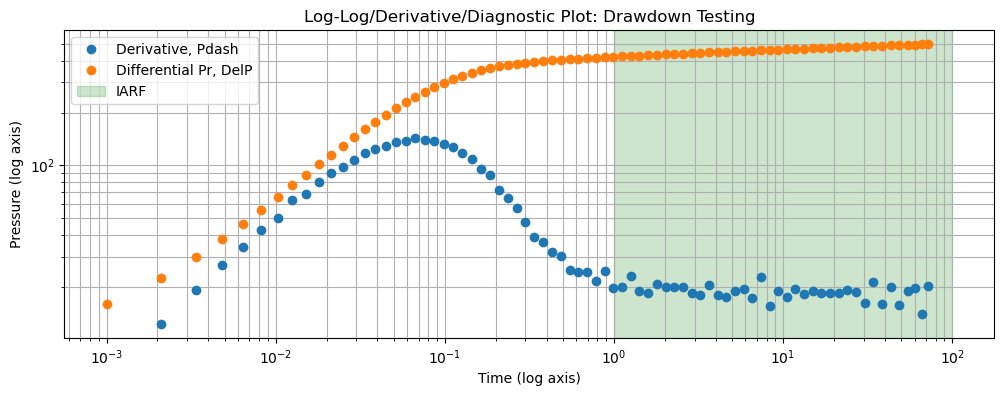

In [27]:
# Log-Log plot

plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['time'], df['Pdash'],'o',label='Derivative, Pdash',lw =3)
plt.loglog(df['time'], df['delP'],'o', label='Differential Pr, DelP', lw=3)

plt.axvspan(1,100, color='green', alpha=0.2,label='IARF')

plt.xlabel('Time (log axis)')
plt.ylabel('Pressure (log axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot: Drawdown Testing')

plt.legend()
plt.grid(True, which='Both')

plt.show()


In [31]:
df[df['time']>1]['pressure'].mean()
#print(f'The pressure after 1 hour is {pr} psi')

2298.7667567567564

In [32]:
tmin_iarf = 1 #hr
tmax_iarf = 50 #hr

In [33]:
df_semilog = df[(df['time']>=tmin_iarf) & (df['time']<=tmax_iarf)]

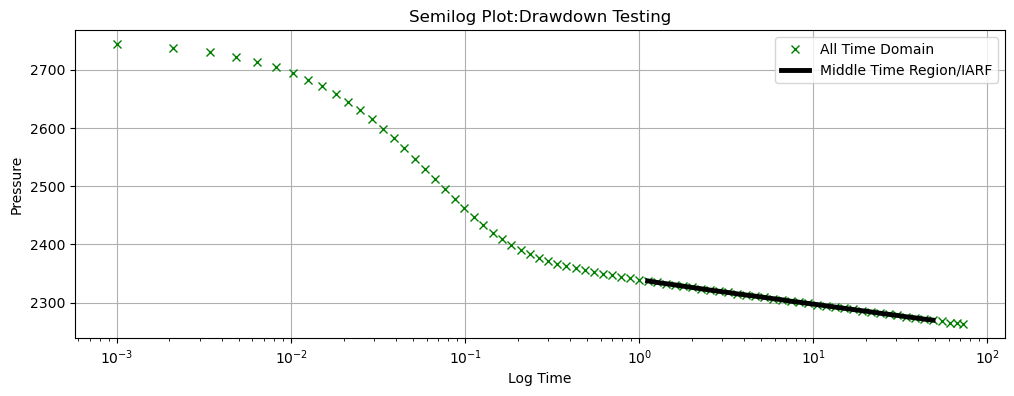

In [34]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],'x', color='green',label='All Time Domain')
plt.semilogx(df_semilog['time'], df_semilog['pressure'], color='black',lw=3.5,label='Middle Time Region/IARF')

plt.xlabel('Log Time')
plt.ylabel('Pressure')

plt.title('Semilog Plot:Drawdown Testing')
plt.grid()
plt.legend()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='pressure'>

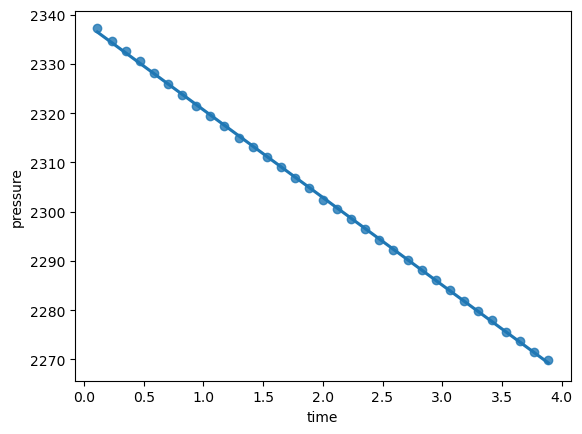

In [35]:
t = np.log(df_semilog['time'])
P  = df_semilog['pressure']

sns.regplot(t,P)

In [36]:

np.polyfit(t,P,1)

array([ -17.7869321 , 2338.42912687])

In [37]:
[slope,intercept] = np.polyfit(t,P,1)

In [38]:
abs(slope)

17.78693210498946

In [39]:
m = abs(slope)

m = 162.6 (quB/kh)

In [40]:
# q = flowrate #bbl/d
# u= porosity # cp
# B = Formation Volume Factor # rb/stb
# k = permeability # mD
# h = thickness # ft

q = 125 # bbl/d
u = 2.1 #cp
B = 1.14 # rb/stb
h = 50 #ft

k = 162.6*q*B*u/m/h

print(f'Formation Permeability is: {np.round(k)} miliDarcies')

Formation Permeability is: 55.0 miliDarcies


## Calculating Reserves & Forecasts with Data: DCA

In [23]:
dca_df = pd.read_csv('production_rate_sample.csv',index_col=0, parse_dates=True)

In [24]:
dca_df.head()

,Date,Rate (SCF/d)
0,2004-04-01,2706039.0
1,2004-05-01,2492086.2
2,2004-06-02,1816846.1
3,2004-07-02,1920207.4
4,2004-07-04,1683521.4


In [26]:
dca_df['Date'] = pd.to_datetime(dca_df['Date'])

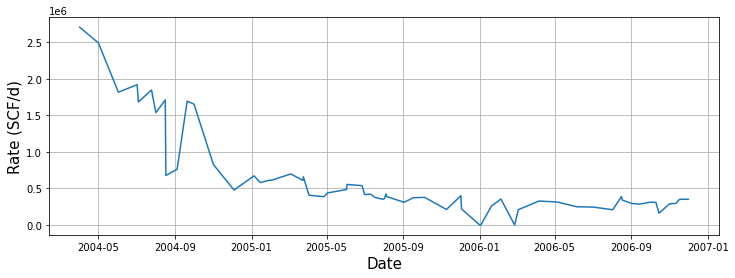

In [31]:
plt.figure(figsize=(12,4))
plt.style.use('default')
plt.plot(dca_df['Date'],dca_df['Rate (SCF/d)'])
plt.xlabel('Date',size=15)
plt.ylabel('Rate (SCF/d)', size=15)
plt.grid()

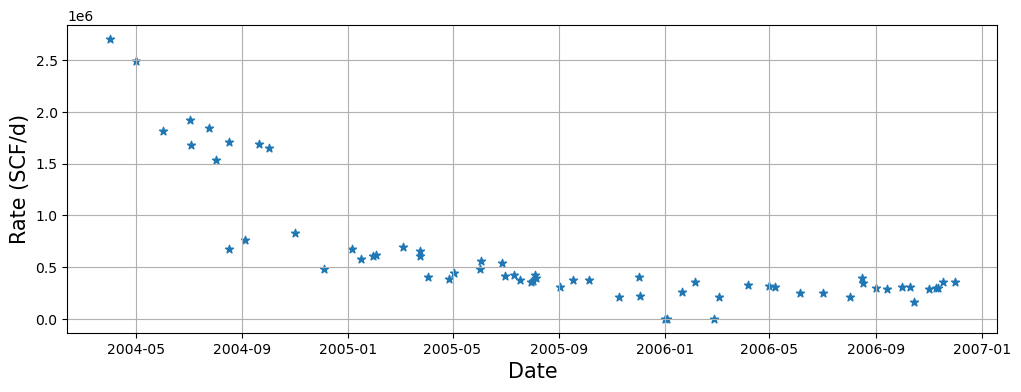

In [34]:
plt.figure(figsize=(12,4))
plt.style.use('default')
plt.scatter(y=dca_df['Rate (SCF/d)'], x=dca_df['Date'],marker="*")
plt.xlabel('Date',size=15)
plt.ylabel('Rate (SCF/d)', size=15)
plt.grid()

In [40]:
def day_maker(df):
    
    
    days = []
    
    for d in range(len(df)):
        delta = df.Date[d] - df.Date[0]
        
        days.append(delta.days)
        
    days = np.array(days)
    
    return days

In [41]:
dca_df['days'] = day_maker(dca_df)

In [42]:
dca_df.head()

,Date,Rate (SCF/d),days
0,2004-04-01,2706039.0,0
1,2004-05-01,2492086.2,30
2,2004-06-02,1816846.1,62
3,2004-07-02,1920207.4,92
4,2004-07-04,1683521.4,94


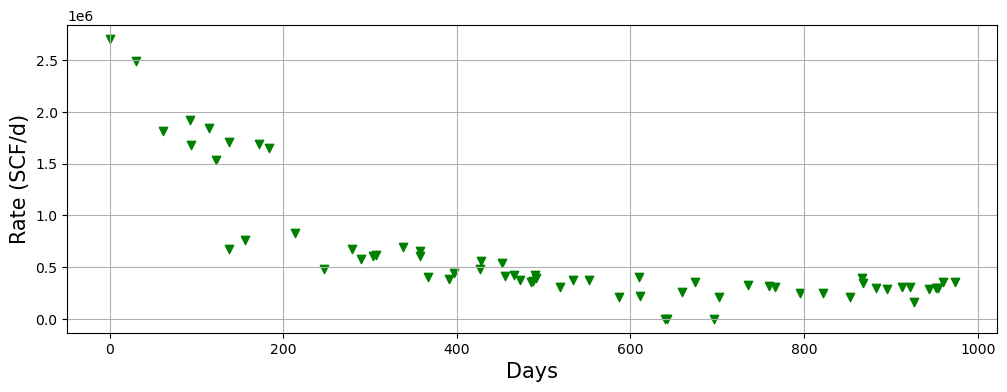

In [45]:
plt.figure(figsize=(12,4))
plt.style.use('default')
plt.scatter(y=dca_df['Rate (SCF/d)'], x=dca_df['days'], marker='v',color='green')

plt.xlabel('Days',size=15)
plt.ylabel('Rate (SCF/d)', size=15)

plt.grid()

In [35]:
from scipy.optimize import curve_fitve_fit

In [50]:
def q_hyp(t,qi,b,d): 
    
    qfit = qi/(np.abs((1 + b * d * t))**(1/b))
    
    return qfit

def hyp_fitter(q,t):
    # first we have to Normalize so that it converges well and quic
    
    q_n = q/max(q)
    t_n = t/max(t)
    
    # curve fit  (optimization of parameters)
    
    params= curve_fit(q_hyp, t_n, q_n)
    [qi,b,d]  = params[0]
    
    # These are for normalized t and q
    # we must re-adjust for q and t (non - normalized)
    
    d_f = d/max(t)
    qi_f = qi*max(q)
    
    # now we can use these parameters
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    
    return q_hyp_fit, params
    
    

In [51]:
q= dca_df['Rate (SCF/d)']
t = dca_df['days']

q_fit , params = hyp_fitter(q,t)

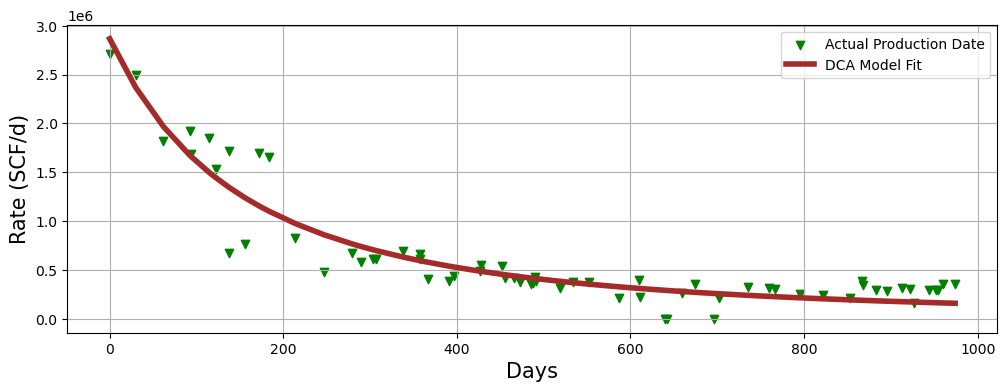

In [55]:
plt.figure(figsize=(12,4))
plt.style.use('default')

plt.scatter(t,q,marker='v',color = 'green',label='Actual Production Date')
plt.plot(t,q_fit,color='brown',lw=4, label='DCA Model Fit')

plt.ylabel('Rate (SCF/d)', size=15)
plt.xlabel('Days', size=15)

plt.grid()
plt.legend()